<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.371802,80.119950,82.647541,0.048557,234.187850,234.133625,0.054225
1,0.0,1.0,56.423543,38.112447,93.362173,-0.005022,197.893141,197.885332,0.007809
2,0.0,2.0,79.080709,74.334796,51.512144,-0.011230,214.916419,214.931723,-0.015305
3,0.0,3.0,20.376971,28.231825,27.800102,-0.140736,86.268161,86.409126,-0.140965
4,0.0,4.0,74.523404,70.512491,32.624604,-0.015044,187.645454,187.668857,-0.023403
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,41.781887,97.703945,69.311107,0.010350,218.807288,218.802622,0.004667
249996,999.0,246.0,23.152490,33.973913,32.081995,0.033858,99.242257,99.197288,0.044968
249997,999.0,247.0,24.967484,81.072628,34.417529,0.024565,150.482207,150.455513,0.026694
249998,999.0,248.0,70.037600,20.042933,64.879110,0.080941,165.040585,164.952174,0.088410


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    61.371802  80.119950  82.647541  ...  234.187850  234.133625  0.054225
      1.0    56.423543  38.112447  93.362173  ...  197.893141  197.885332  0.007809
      2.0    79.080709  74.334796  51.512144  ...  214.916419  214.931723 -0.015305
      3.0    20.376971  28.231825  27.800102  ...   86.268161   86.409126 -0.140965
      4.0    74.523404  70.512491  32.624604  ...  187.645454  187.668857 -0.023403
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  41.781887  97.703945  69.311107  ...  218.807288  218.802622  0.004667
      246.0  23.152490  33.973913  32.081995  ...   99.242257   99.197288  0.044968
      247.0  24.967484  81.072628  34.417529  ...  150.482207  150.455513  0.026694
      248.0  70.037600  20.042933  64.879110  ...  165.040585  164.952174  0.088410
      249.0  84.805702  42.728486  83.306004  ...  220.837890  220.839718 -0.001829

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    61.371802  80.119950  82.647541  ...  234.187850  234.133625  0.054225
      1.0    56.423543  38.112447  93.362173  ...  197.893141  197.885332  0.007809
      2.0    79.080709  74.334796  51.512144  ...  214.916419  214.931723 -0.015305
      3.0    20.376971  28.231825  27.800102  ...   86.268161   86.409126 -0.140965
      4.0    74.523404  70.512491  32.624604  ...  187.645454  187.668857 -0.023403
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  41.781887  97.703945  69.311107  ...  218.807288  218.802622  0.004667
      246.0  23.152490  33.973913  32.081995  ...   99.242257   99.197288  0.044968
      247.0  24.967484  81.072628  34.417529  ...  150.482207  150.455513  0.026694
      248.0  70.037600  20.042933  64.879110  ...  165.040585  164.952174  0.088410
      249.0  84.805702  42.728486  83.306004  ...  220.837890  220.839718 -0.001829

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.371802,80.119950,82.647541,0.048557,234.187850,234.133625,0.054225
1,0.0,1.0,56.423543,38.112447,93.362173,-0.005022,197.893141,197.885332,0.007809
2,0.0,2.0,79.080709,74.334796,51.512144,-0.011230,214.916419,214.931723,-0.015305
3,0.0,3.0,20.376971,28.231825,27.800102,-0.140736,86.268161,86.409126,-0.140965
4,0.0,4.0,74.523404,70.512491,32.624604,-0.015044,187.645454,187.668857,-0.023403
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,41.781887,97.703945,69.311107,0.010350,218.807288,218.802622,0.004667
249996,999.0,246.0,23.152490,33.973913,32.081995,0.033858,99.242257,99.197288,0.044968
249997,999.0,247.0,24.967484,81.072628,34.417529,0.024565,150.482207,150.455513,0.026694
249998,999.0,248.0,70.037600,20.042933,64.879110,0.080941,165.040585,164.952174,0.088410


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    61.371802  80.119950  82.647541  ...  234.187850  234.133625  0.054225
      1.0    56.423543  38.112447  93.362173  ...  197.893141  197.885332  0.007809
      2.0    79.080709  74.334796  51.512144  ...  214.916419  214.931723 -0.015305
      3.0    20.376971  28.231825  27.800102  ...   86.268161   86.409126 -0.140965
      4.0    74.523404  70.512491  32.624604  ...  187.645454  187.668857 -0.023403
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  41.781887  97.703945  69.311107  ...  218.807288  218.802622  0.004667
      246.0  23.152490  33.973913  32.081995  ...   99.242257   99.197288  0.044968
      247.0  24.967484  81.072628  34.417529  ...  150.482207  150.455513  0.026694
      248.0  70.037600  20.042933  64.879110  ...  165.040585  164.952174  0.088410
      249.0  84.805702  42.728486  83.306004  ...  220.837890  220.839718 -0.001829

[250000 rows x 7 columns]

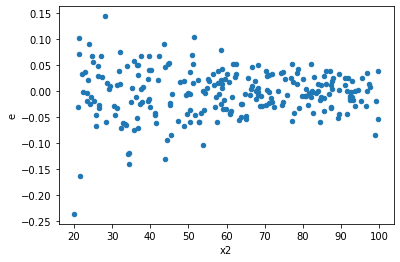

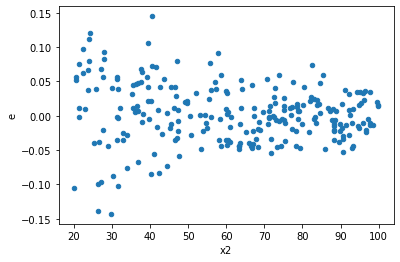

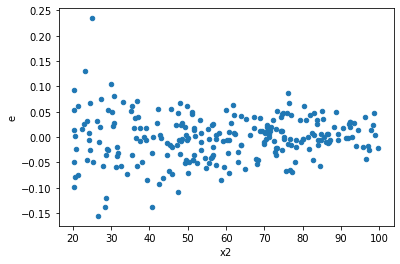

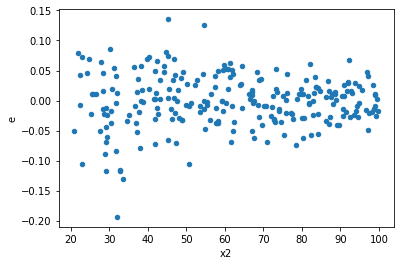

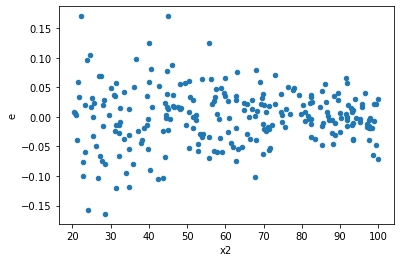

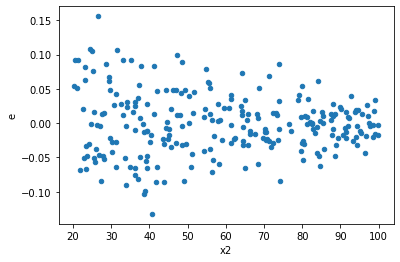

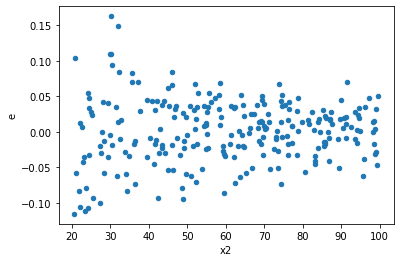

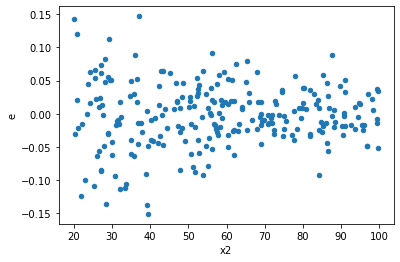

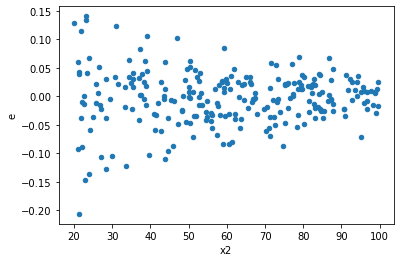

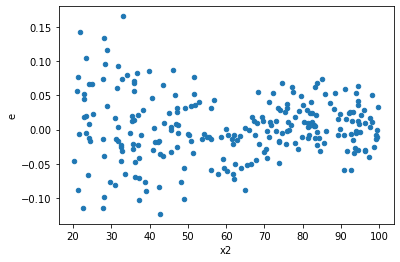

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,122.0,122.0,0.18822798171013944,0.26047414655692736,0.0015556031546292515,0.0021526788971646888,1.3838226611707656,0.07402419104176428,0.9629879044791179,Reject005=1 : Homoscedasticity
2.0,133.0,111.0,0.25447947440405044,0.24046797051490118,0.0019278748060912911,0.0021860724592263742,1.1322260456175557,0.49134754404165193,0.754326227979174,Reject005=1 : Homoscedasticity
4.0,124.0,120.0,0.10471765804190163,0.30340150141524724,0.0008513630735113954,0.002549592448867624,2.9939065737156376,3.2425542251246497e-09,0.9999999983787229,Reject005=0 : Heteroscedasticity
5.0,127.0,117.0,0.23147681469429235,0.2366251164370164,0.0018371175769388282,0.002039871693422555,1.1096121471278841,0.5649428144899931,0.7175285927550035,Reject005=1 : Homoscedasticity
10.0,111.0,133.0,0.22125081402014504,0.28833442405287546,0.002011371036546773,0.0021843516973702685,1.0876344528260977,0.6491265636396999,0.67543671818015,Reject005=1 : Homoscedasticity
11.0,133.0,111.0,0.10485463331998425,0.33834362951612706,0.0007943532827271535,0.003075851177419337,3.8663310759086547,2.708944180085382e-13,0.9999999999998646,Reject005=0 : Heteroscedasticity
12.0,126.0,118.0,0.18605229010757018,0.32194415100430485,0.0014884183208605615,0.002751659410293204,1.8477110542822828,0.0007544857035550745,0.9996227571482225,Reject005=0 : Heteroscedasticity
13.0,110.0,134.0,0.15842672368796884,0.2991497947479497,0.0014534561806235674,0.0022492465770522535,1.55005873576964,0.017711345930474742,0.9911443270347626,Reject005=0 : Heteroscedasticity
14.0,117.0,127.0,0.12854058888344863,0.4450622524119365,0.0011081085248573158,0.0035322400985074325,3.189793855233165,6.675704433689589e-10,0.9999999996662148,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,122.0,122.0,0.18822798171013944,0.26047414655692736,0.0015556031546292515,0.0021526788971646888,1.3838226611707656,0.07402419104176428,Reject005=1 : Homoscedasticity
1.0,126.0,118.0,0.4372644172158435,0.0853999539133297,0.003498115337726748,0.000729914136011365,0.20854608266071406,2.7763985949764986e-16,Reject005=0 : Heteroscedasticity
2.0,133.0,111.0,0.25447947440405044,0.24046797051490118,0.0019278748060912911,0.0021860724592263742,1.1322260456175557,0.49134754404165193,Reject005=1 : Homoscedasticity
3.0,118.0,126.0,0.27266227473507915,0.18952610514551335,0.0023304467926075143,0.001516208841164107,0.6509617137782051,0.01811381970531368,Reject005=0 : Heteroscedasticity
4.0,124.0,120.0,0.10471765804190163,0.30340150141524724,0.0008513630735113954,0.002549592448867624,2.9939065737156376,3.2425542251246497e-09,Reject005=0 : Heteroscedasticity
5.0,127.0,117.0,0.23147681469429235,0.2366251164370164,0.0018371175769388282,0.002039871693422555,1.1096121471278841,1.435057185510007,Reject005=1 : Homoscedasticity
6.0,127.0,117.0,0.3324542182521881,0.10946605248680949,0.0026385255416840328,0.0009436728662655991,0.35740898693845313,3.60556172846658e-08,Reject005=0 : Heteroscedasticity
7.0,132.0,112.0,0.28589516671391585,0.20040524101708718,0.0021824058527779838,0.0018054526217755602,0.8261485981505169,0.29808944073276145,Reject005=1 : Homoscedasticity
8.0,122.0,122.0,0.2848862835574334,0.2421314170769032,0.0023544320955159784,0.0020010860915446547,0.849923043164306,0.37040773774993796,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    530
Reject005=1 : Homoscedasticity      470
Name: Result_test, dtype: int64